In [11]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import cdist

data = pd.read_csv('country.txt', delimiter=',')

data_clustering = data.drop('country', axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

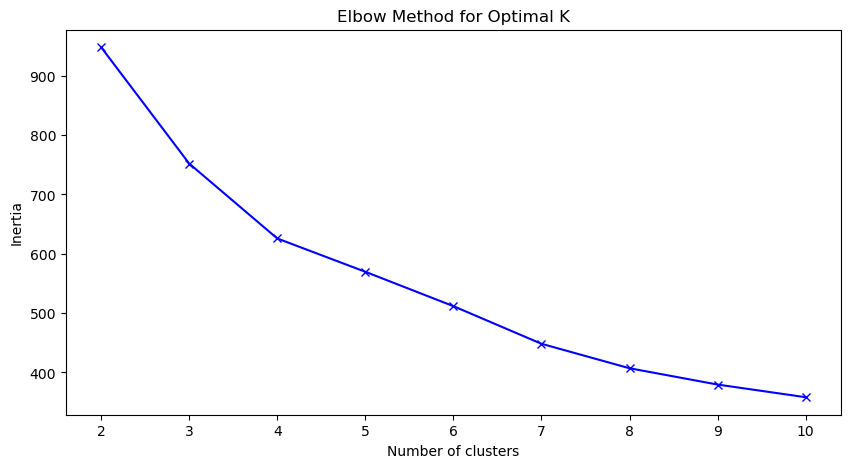

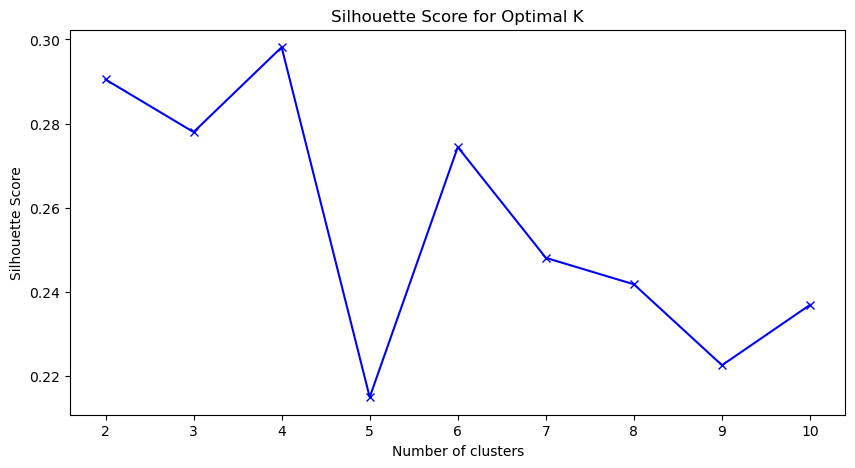

In [12]:
inertia = []
silhouette_scores = []
K = range(2, 11)

# K-Means-Clustering:

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_)) 

# elbow
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# silhouette
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

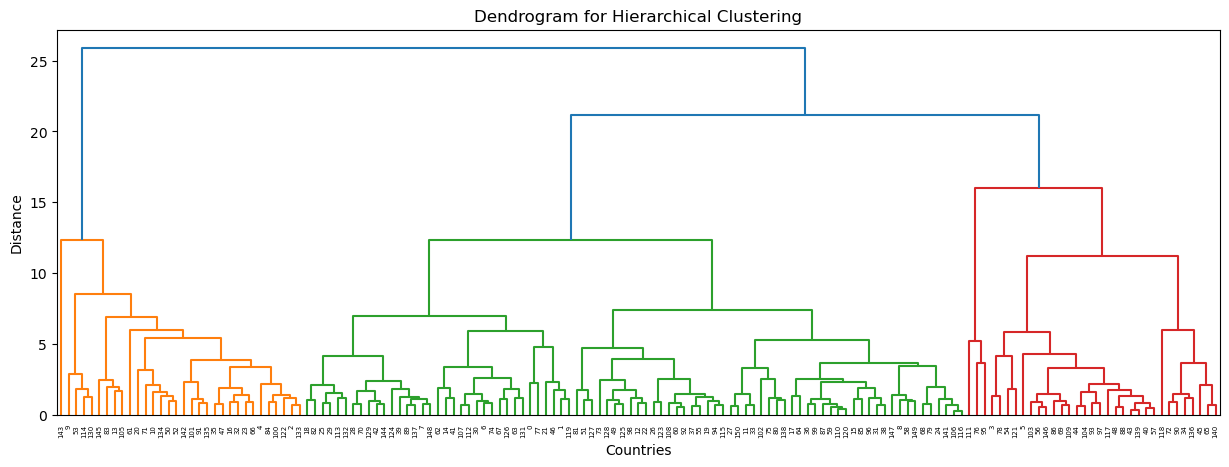

In [13]:
plt.figure(figsize=(15, 5))

hierclus = linkage(data_scaled, method='ward')
dendrogram(hierclus)
hierarchical_labels = fcluster(hierclus, t=3, criterion='maxclust')

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance') 
plt.show()



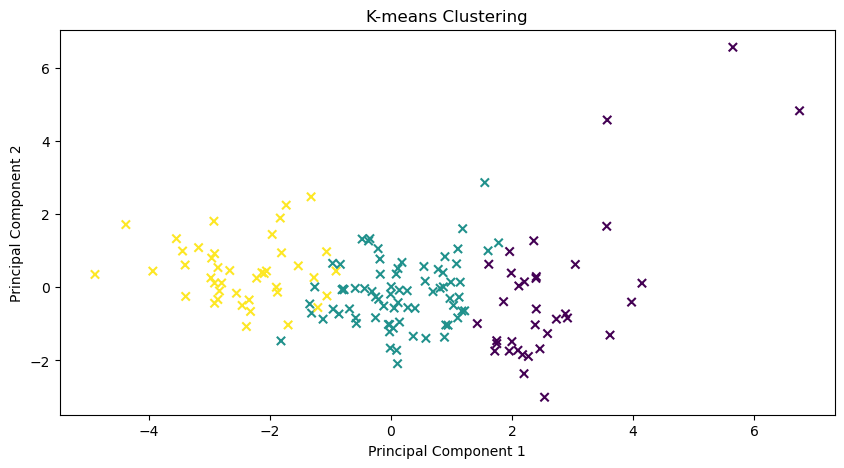

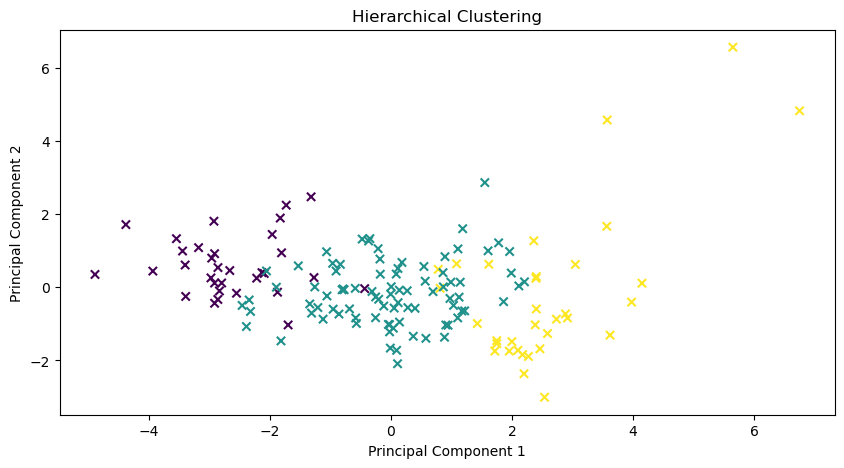

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# K-means
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# hierarchical
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis', marker='x')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [23]:
data['KMeans_Cluster'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

def find_typical_country(cluster_number):
    cluster_data = data[data['KMeans_Cluster'] == cluster_number]
    cluster_data_clean = cluster_data.drop(['country', 'KMeans_Cluster'], axis=1)
    distances = cdist(cluster_data_clean, [centroids[cluster_number]])
    typical_index = np.argmin(distances)
    return cluster_data.iloc[typical_index]['country']

for i in range(3):
    typical_county = find_typical_country(i)
    print(f"Country tyical for cluster {i}: {typical_county}")


def is_worst_high(column_name):
    return column_name in ['child_mort', 'inflation', 'total_fer']

def is_worst_low(column_name):
    return column_name in ['life_expec', 'income', 'gdpp', 'health', 'imports', 'exports']

def find_worst_country(cluster_number, column_name):
    cluster_data = data[data['KMeans_Cluster'] == cluster_number]
    
    if is_worst_high(column_name):
        idx = cluster_data[column_name].idxmax()
    elif is_worst_low(column_name):
        idx = cluster_data[column_name].idxmin()
    else:
        raise ValueError(f"Wrong value: {column_name}")
    
    worst_country = cluster_data.loc[idx]
    return worst_country['country'], worst_country[column_name]

clusters = data['KMeans_Cluster'].unique()
columns = data.columns.difference(['country', 'KMeans_Cluster'])

for cluster_number in clusters:
    print(f"\nCluster {cluster_number}:\n")
    for column_name in columns:
        country, value = find_worst_country(cluster_number, column_name)
        print(f"Worst country from Cluster {cluster_number} based on {column_name}: {country} with value = {value}")
    
    print("\n\n")

Country tyical for cluster 0: Belgium
Country tyical for cluster 1: Montenegro
Country tyical for cluster 2: Sudan

Cluster 1:

Worst country from Cluster 1 based on child_mort: Myanmar with value = 64.4
Worst country from Cluster 1 based on exports: Myanmar with value = 0.109
Worst country from Cluster 1 based on gdpp: Nepal with value = 592
Worst country from Cluster 1 based on health: Myanmar with value = 1.97
Worst country from Cluster 1 based on imports: Myanmar with value = 0.0659
Worst country from Cluster 1 based on income: Nepal with value = 1990
Worst country from Cluster 1 based on inflation: Venezuela with value = 45.9
Worst country from Cluster 1 based on life_expec: Vanuatu with value = 63.0
Worst country from Cluster 1 based on total_fer: Samoa with value = 4.34




Cluster 2:

Worst country from Cluster 2 based on child_mort: Haiti with value = 208.0
Worst country from Cluster 2 based on exports: Timor-Leste with value = 2.2
Worst country from Cluster 2 based on gdpp: B

In [ ]:
### 3. please write the suggestion to CEO about the country you suggest

# Dear CEO of the NGO, consider the following:
# The most benefit from investing money can be done where the countries are in most need,
# because in relation to the circumstances there, little money can have the biggest impact.

# I'd therefore recommend to completely skip the countries of the first two clusters (countries like Belgium and Montenegro),
# and fully focus on countries like Sudan, i. e. the third cluster.

# From the third cluster, which country should get money to what end? 
# In Haiti, I would spent a third of the money to fight child mortality and low life expactency.
# Invest in health care, health information campaigns and medical supplies there.

# Then I'd spend another third in Niger to figt high fertility. Increase education and
# retirement provision, to make having many children less needed and help focus ressources
# on fewer children. 

# Another third should go to Burundi, the country with the lowest GDDP to help
# increase economic growth, which would benefit society as a whole.

# In all, it should be checked if any influence on the given numbers can be seen
# after the investments, to track the success of the measures taken.

# This would be a wise way to spend money based on given data.



# Recommendations #

* KMeans Cluster 0, HierarchicalCluster 3: Developed countries with high income, low child mortality, high life expectancy, and low fertility rates. These countries may require less immediate attention in terms of basic socio-economic development. A recommendation would be to focus on development projects, technology transfers and innovation in healthcare and education. Representative country: Israel.
* KMeans Cluster 1, HierarchicalCluster 2: Developing countries with moderate income, moderate child mortality, and life expectancy. These countries could benefit from strategic investments in healthcare and education to boost overall development. Representative country: Samoa.
* KMeans Cluster 2, HierarchicalCluster 1: Least developed countries with low income, high child mortality, and low life expectancy. These countries should be prioritized for basic healthcare, nutrition, and education support to improve their overall development. Also ensuring contraceptives like condoms are available in the necessary quantities and at the right locations is crucial for a lower fertility rate. This includes access to health services, distribution channels, and inventory management. Representative country: Niger.

My recommendation would probably be to invest in Haiti, Niger and Pakistan. These are the countries which have the worst values in very important features like child mortality, health, life expectancy and total fertility. Because child mortality and life expectancy is the worst in Haiti, I would priorize this country. 

Again:

Worst country in K-means Cluster 2 based on child_mort: Haiti with value = 208.0
Worst country in K-means Cluster 2 based on exports: Timor-Leste with value = 2.2
Worst country in K-means Cluster 2 based on gdpp: Burundi with value = 231
Worst country in K-means Cluster 2 based on health: Pakistan with value = 2.2
Worst country in K-means Cluster 2 based on imports: Sudan with value = 17.2
Worst country in K-means Cluster 2 based on income: Congo, Dem. Rep. with value = 609
Worst country in K-means Cluster 2 based on inflation: Nigeria with value = 104.0
Worst country in K-means Cluster 2 based on life_expec: Haiti with value = 32.1
Worst country in K-means Cluster 2 based on total_fer: Niger with value = 7.49